In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from analysis import plot

%matplotlib inline

RESULT_PATH = "simulation_results"
OUTPUT_PATH = "analysis_results"
overwrite = False

pop_color = plot.pop_color

savefig = True

In [2]:
waves = ['gamma', 'beta']
populations = ['Pv', 'Sst']
n_waves = len(waves)
n_pop = len(populations)

wave_lines = {'gamma': ':', 'beta': '--'}
pop_map = {'Pv': 'FSI', 'Sst': 'LTS'}

In [3]:
DATA_PATH = os.path.join(OUTPUT_PATH, "InVivoDataXcorr")

files = os.listdir(DATA_PATH)
pop_type = {}
session_id = []
xcorr = {}
lags = {}
for f in files:
    ss = f.split('_')
    s = ss[1]
    if s not in xcorr:
        session_id.append(s)
        pop_type[s] = ss[2].title()
        xcorr[s] = {}
        lags[s] = {}
    w = ss[3]
    file = os.path.join(DATA_PATH, f)
    if len(ss) <= 5:
        xcorr[s][w] = np.load(file)
    else:
        lags[s][w] = np.load(file)

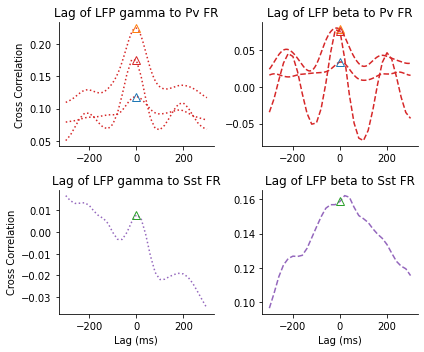

In [4]:
max_lag = 300. # ms. maximum time lag for cross-correlation
figsize = (3, 2.5)

fig, axs = plt.subplots(n_pop, n_waves, figsize=(n_waves * figsize[0], n_pop * figsize[1]), squeeze=False)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, s in enumerate(session_id):
    p = pop_type[s]
    for ax, w in zip(axs[populations.index(p)], waves):
        lag = lags[s][w]
        x = xcorr[s][w]
        idx = (lag >= -max_lag) & (lag <= max_lag)
        lag0 = np.argmin(np.abs(lag))
        ax.plot(lag[idx], x[idx], color=pop_color[pop_map[p]], linestyle=wave_lines[w])
        ax.plot(lag[lag0], x[lag0], '^', color=colors[i], markersize=8, markerfacecolor='none')
        ax.set_title(f'Lag of LFP {w} to {p} FR')
for ax in axs[-1, :].ravel():
    ax.set_xlabel('Lag (ms)')
for ax in axs[:, 0].ravel():
    ax.set_ylabel('Cross Correlation')
plt.tight_layout()

if savefig:
    plot.savefig(fig, 'Fig_5G')

plt.show()

721123822


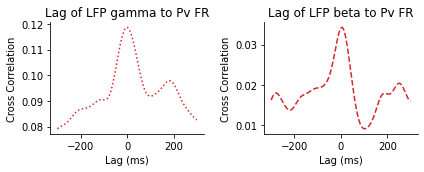

760345702


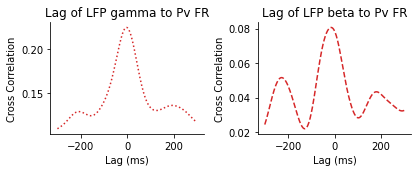

762602078


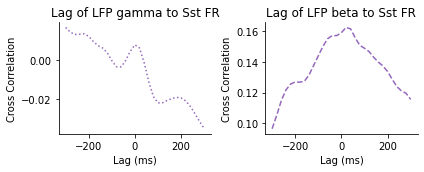

797828357


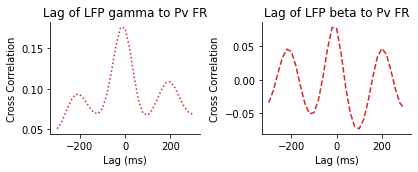

In [5]:
for s in session_id:
    print(s)
    p = pop_type[s]
    fig, axs = plt.subplots(1, n_waves, figsize=(n_waves * figsize[0], figsize[1]), squeeze=True)
    for ax, w in zip(axs, waves):
        lag = lags[s][w]
        x = xcorr[s][w]
        idx = (lag >= -max_lag) & (lag <= max_lag)
        ax.plot(lag[idx], x[idx], color=pop_color[pop_map[p]], linestyle=wave_lines[w])
        ax.set_xlabel('Lag (ms)')
        ax.set_ylabel('Cross Correlation')
        ax.set_title(f'Lag of LFP {w} to {p} FR')
    plt.tight_layout()
    plt.show()